In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

import re
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer

warnings.filterwarnings('ignore')

In [84]:
pip install arcticdata

In [85]:
import arcticdata.ExploratoryDataAnalysis as eda

In [86]:
df = pd.read_csv('amazon_reviews_sample_dataset.tsv', delimiter='\t')

In [87]:
#returns number of records from the begining of the dataset
df.head(10)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


In [88]:
#returns number of records from the end of the dataset
df.tail(10)

,rating,date,variation,verified_reviews,feedback
3140,4,30-Jul-18,White Dot,Barry,1
3141,3,30-Jul-18,Black Dot,,1
3142,4,30-Jul-18,White Dot,My three year old loves it. Good for doing ba...,1
3143,5,30-Jul-18,Black Dot,Awesome device wish I bought one ages ago.,1
3144,5,30-Jul-18,Black Dot,love it,1
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [89]:
#it will return number of rows and columns in the dataset
df.shape

(3150, 5)

In [90]:
#checks null values in each column
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [91]:
#returns complete info from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


1    2893
0     257
Name: feedback, dtype: int64


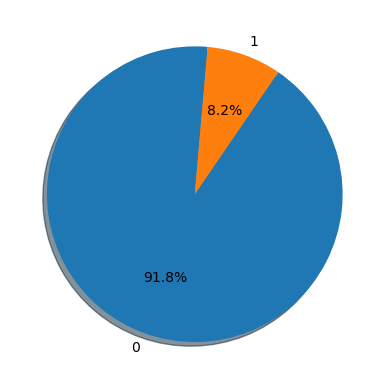

In [92]:
# returns the count of people feedback either 0 or 1
feedback_review_categories = df['feedback'].value_counts()
print(feedback_review_categories)

# Using matplotlib pie chart and label the pie chart
plt.pie(feedback_review_categories,labels=['0','1'],autopct='%1.1f%%',shadow=True,startangle=85);

In [93]:
#returns the statics results over the given dataset
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [94]:
df.describe(include = 'object')

,date,variation,verified_reviews
count,3150,3150,3150
unique,77,16,2301
top,30-Jul-18,Black Dot,
freq,1603,516,79


Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Name: variation, dtype: int64


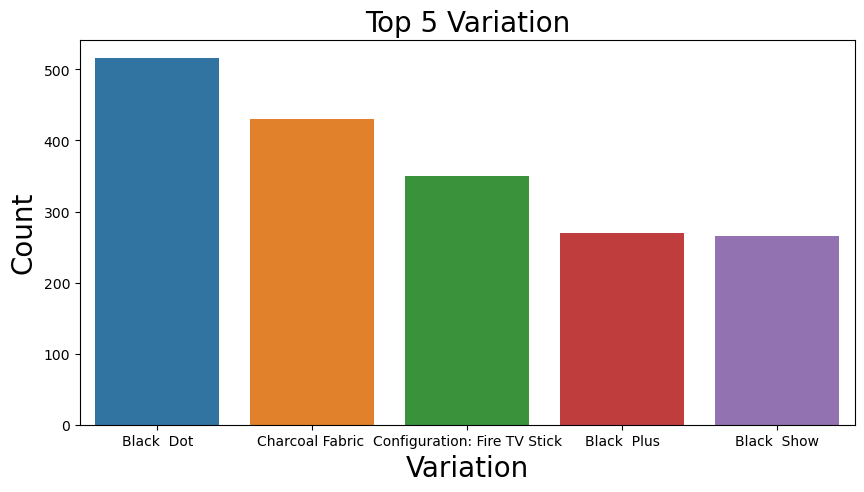

In [95]:
# returns the value counts of variation 
types_of_variation = df.variation.value_counts()[:5]
print(types_of_variation)

# returns the plotting of top 5 variation 

plt.figure(figsize=(10, 5))
sns.barplot(types_of_variation.index, types_of_variation);
plt.xlabel('Variation', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Top 5 Variation', fontsize=20);

In [96]:
#returns the length of each string
df['count'] = df['verified_reviews'].map(len)
df['count']

0        13
1         9
2       195
3       172
4         5
       ... 
3145     50
3146    135
3147    441
3148    380
3149      4
Name: count, Length: 3150, dtype: int64

In [97]:
#  returns the data based on length
df.groupby('count').describe().sample(15)

rating                                              feedback            \
       count      mean       std  min  25%  50%  75%  max    count      mean   
count                                                                          
392      2.0  5.000000  0.000000  5.0  5.0  5.0  5.0  5.0      2.0  1.000000   
193      6.0  4.500000  1.224745  2.0  5.0  5.0  5.0  5.0      6.0  0.833333   
120     15.0  4.333333  1.397276  1.0  4.5  5.0  5.0  5.0     15.0  0.866667   
265      1.0  5.000000       NaN  5.0  5.0  5.0  5.0  5.0      1.0  1.000000   
186      2.0  5.000000  0.000000  5.0  5.0  5.0  5.0  5.0      2.0  1.000000   
160      4.0  5.000000  0.000000  5.0  5.0  5.0  5.0  5.0      4.0  1.000000   
44      14.0  4.785714  0.425815  4.0  5.0  5.0  5.0  5.0     14.0  1.000000   
1309     1.0  3.000000       NaN  3.0  3.0  3.0  3.0  3.0      1.0  1.000000   
7       33.0  4.878788  0.331434  4.0  5.0  5.0  5.0  5.0     33.0  1.000000   
532      1.0  5.000000       NaN  5.0  5.0  5.0  5.0  5.0      1.0  1.000000   
1330     1.0  4.000000       NaN  4.0  4.0  4.0  4.0  4.0      1.0  1.000000   
164      7.0  4.714286  0.487950  4.0  4.5  5.0  5.0  5.0      7.0  1.000000   
276      1.0  5.000000       NaN  5.0  5.0  5.0  5.0  5.0      1.0  1.000000   
236      2.0  4.000000  0.000000  4.0  4.0  4.0  4.0  4.0      2.0  1.000000   
364      2.0  5.000000  0.000000  5.0  5.0  5.0  5.0  5.0      2.0  1.000000   

                                          
            std  min  25%  50%  75%  max  
count                                     
392    0.000000  1.0  1.0  1.0  1.0  1.0  
193    0.408248  0.0  1.0  1.0  1.0  1.0  
120    0.351866  0.0  1.0  1.0  1.0  1.0  
265         NaN  1.0  1.0  1.0  1.0  1.0  
186    0.000000  1.0  1.0  1.0  1.0  1.0  
160    0.000000  1.0  1.0  1.0  1.0  1.0  
44     0.000000  1.0  1.0  1.0  1.0  1.0  
1309        NaN  1.0  1.0  1.0  1.0  1.0  
7      0.000000  1.0  1.0  1.0  1.0  1.0  
532         NaN  1.0  1.0  1.0  1.0  1.0  
1330        NaN  1.0  1.0  1.0  1.0  1.0  
164    0.000000  1.0  1.0  1.0  1.0  1.0  
276         NaN  1.0  1.0  1.0  1.0  1.0  
236    0.000000  1.0  1.0  1.0  1.0  1.0  
364    0.000000  1.0  1.0  1.0  1.0  1.0

In [98]:
# returns the data based on the Ratings 

df.groupby('rating').describe()

feedback                                      count              \
          count mean  std  min  25%  50%  75%  max   count        mean   
rating                                                                   
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   161.0  195.000000   
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    96.0  249.187500   
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   152.0  207.296053   
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   455.0  178.520879   
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  2286.0  108.444007   

                                                       
               std  min    25%    50%     75%     max  
rating                                                 
1       212.371226  1.0  36.00  120.0  284.00  1124.0  
2       269.595303  1.0  78.75  163.0  309.25  1686.0  
3       272.194706  1.0  54.00  130.0  284.00  1954.0  
4       215.927849  1.0  34.00   99.0  241.00  1360.0  
5       152.116387  1.0  26.00   64.0  135.00  2851.0

In [99]:
# returns the data based on the feedback 

df.groupby('feedback').describe()

rating                                                count  \
           count      mean       std  min  25%  50%  75%  max   count   
feedback                                                                
0          257.0  1.373541  0.484688  1.0  1.0  1.0  2.0  2.0   257.0   
1         2893.0  4.737643  0.546544  3.0  5.0  5.0  5.0  5.0  2893.0   

                                                                   
                mean         std  min   25%    50%    75%     max  
feedback                                                           
0         215.241245  236.325955  1.0  53.0  137.0  289.0  1686.0  
1         124.659177  174.624491  1.0  29.0   69.0  154.0  2851.0

    VISUALIZATION OF INPUT DATASET

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64


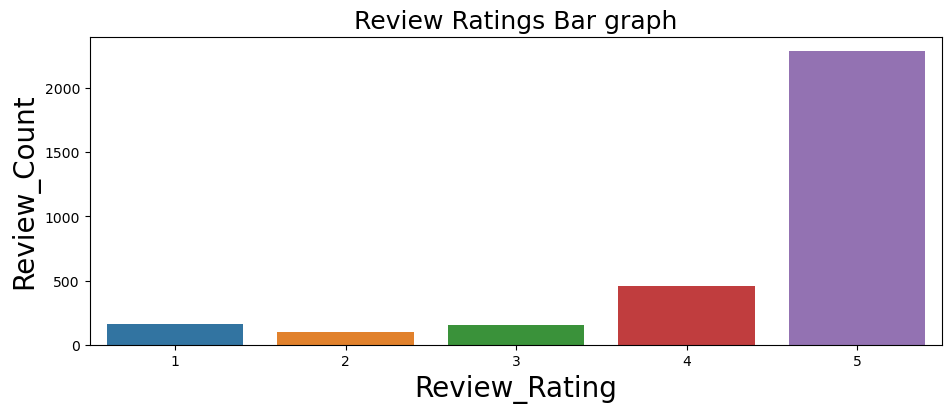

In [100]:
# returns the counts of each label in rating

count_of_ratings = df.rating.value_counts()
print(count_of_ratings)

# returns the plotting of barplot for rating column

plt.figure(figsize=(11, 4))
sns.barplot(count_of_ratings.index, count_of_ratings);
plt.xlabel('Review_Rating', fontsize=20)
plt.ylabel('Review_Count', fontsize=20);
plt.title('Review Ratings Bar graph', fontsize=18);

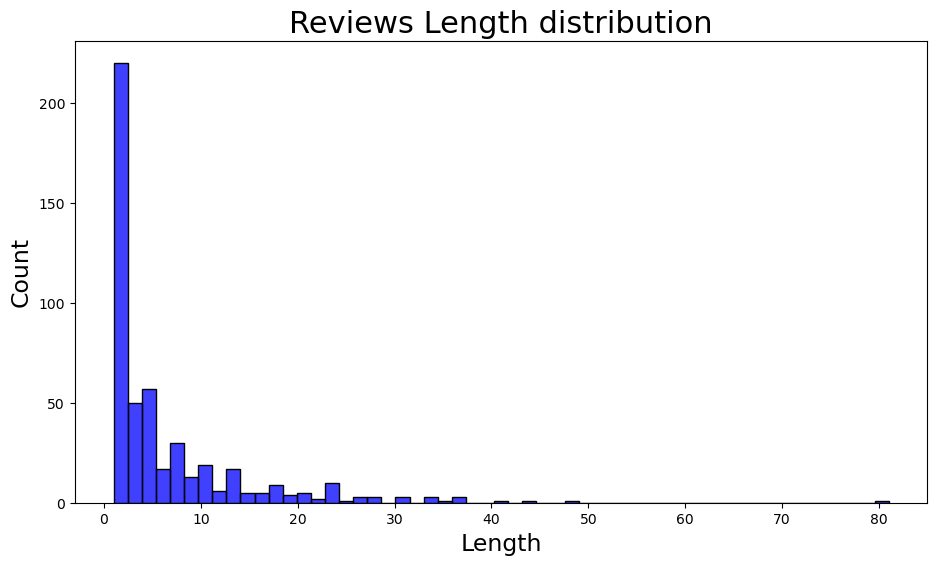

In [101]:
# returns the of count of reivews based on length

review_length_count = df['count'].value_counts()
plt.figure(figsize=(11, 6))
sns.histplot(review_length_count, bins=55, color='blue');
plt.xlabel('Length', fontsize=17)
plt.ylabel('Count', fontsize=17);
plt.title('Reviews Length distribution', fontsize=22);

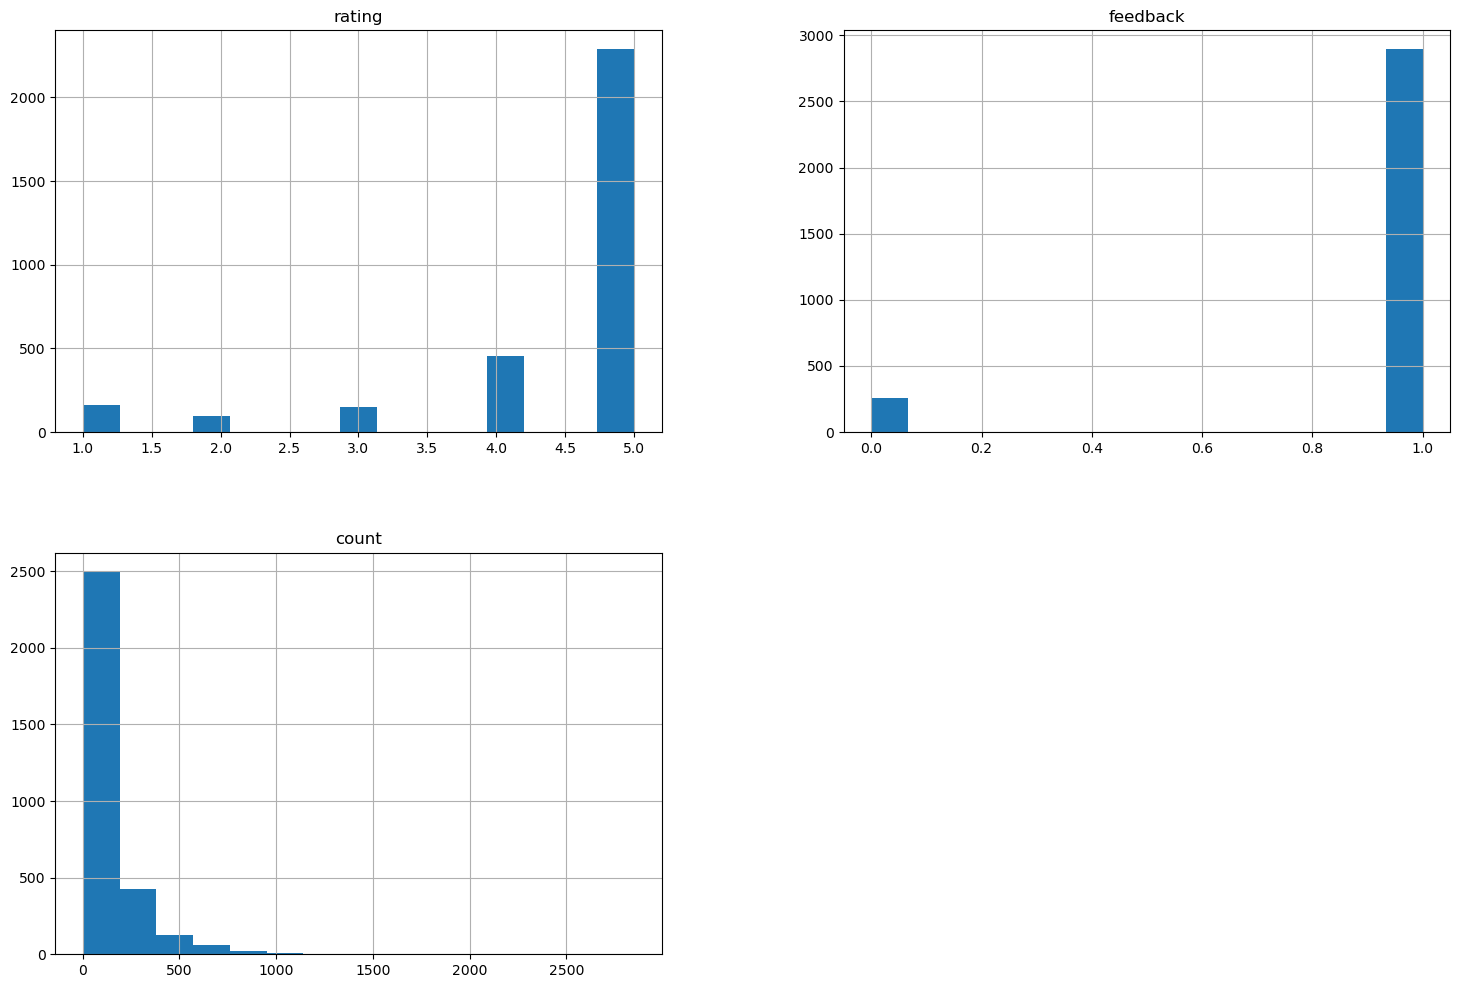

In [102]:
# returns the histograms of rating, feedback and count coloumns

hist_count = 15
df.hist(bins=hist_count, figsize=(18,12))
plt.savefig("histogram counts of each column")
plt.show()

In [103]:
# returns the review based on the count

df[df['count'] == 1]['verified_reviews'].iloc[1]

' '

In [104]:
df[df['count'] == 150]['verified_reviews'].iloc[1]

"Nice add on to a home.What I don't like are the limitations, for example world soccer. It won't give you much info of sport teams other than American."

The feature count is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 238
-Outliers   3*IQR: 102


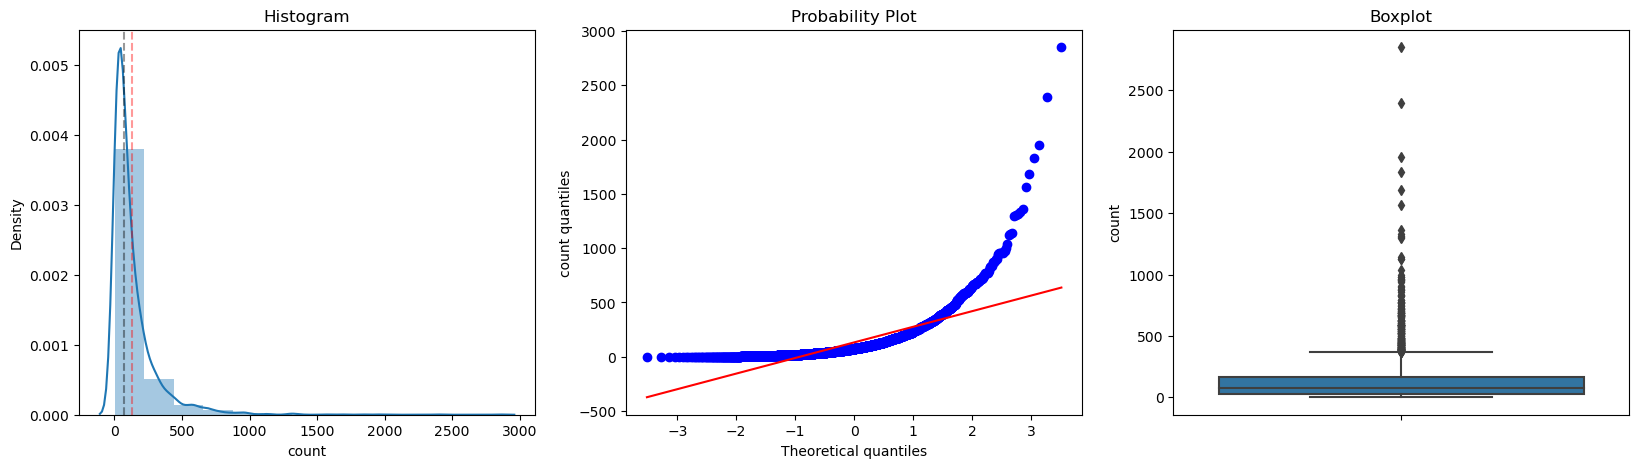

In [105]:
eda.feature_analysis(df,'count')

The feature feedback is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 257
-Outliers   3*IQR: 257


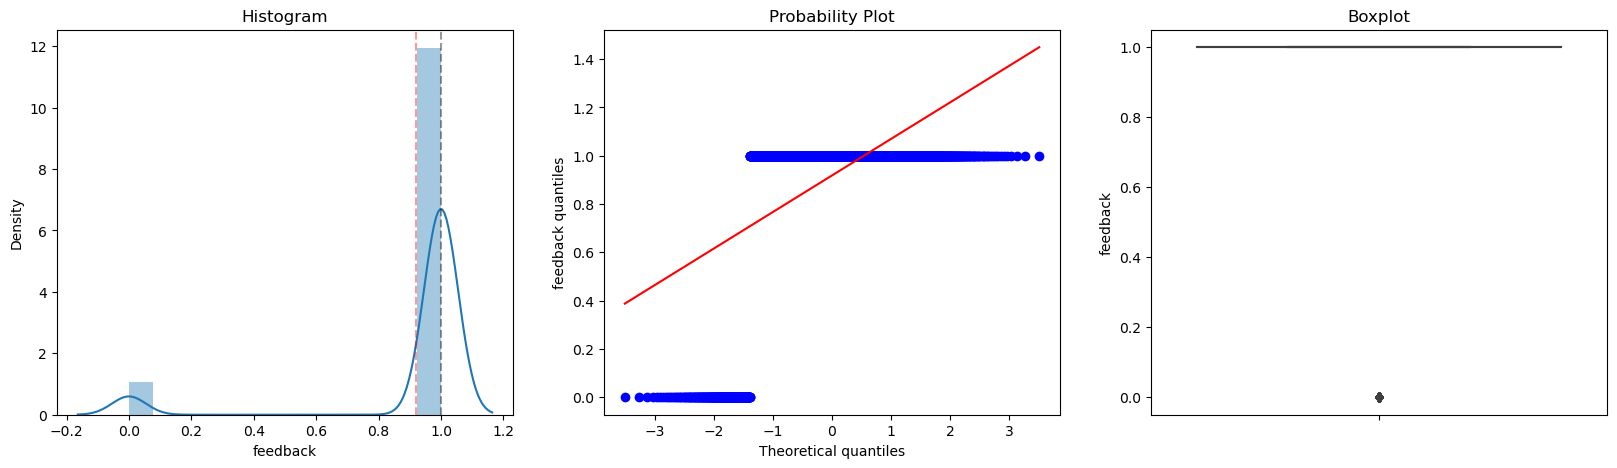

In [106]:
eda.feature_analysis(df,'feedback')

The feature rating is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 257
-Outliers   3*IQR: 0


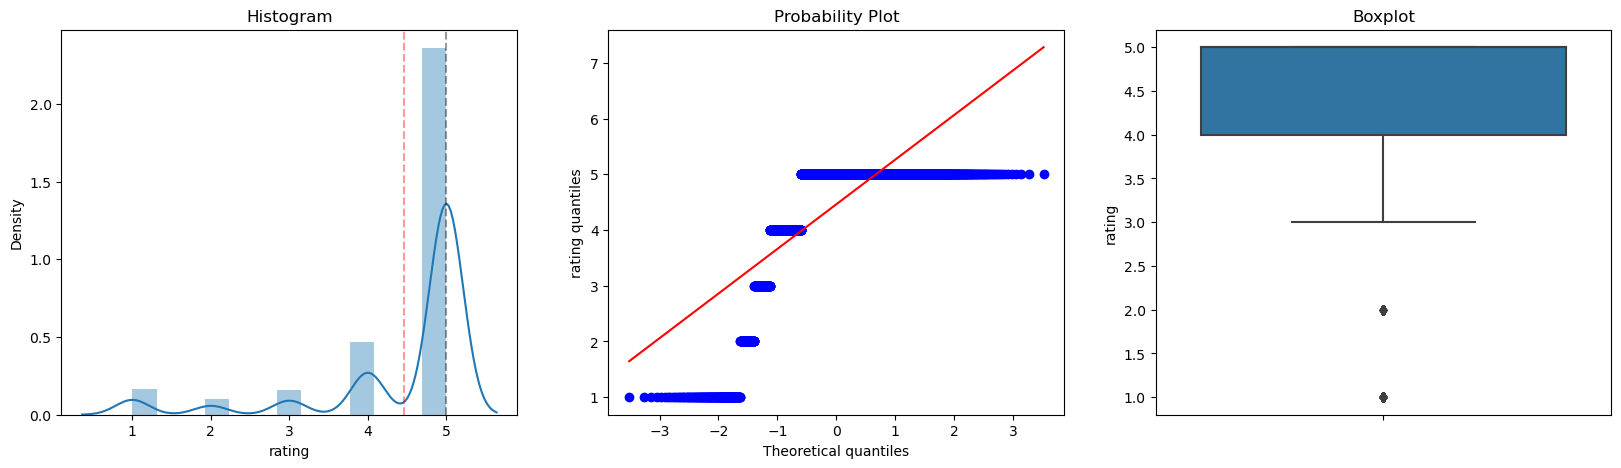

In [107]:
eda.feature_analysis(df,'rating')

In [108]:
# implementation of countvectorizer
countvector_reviews = CountVectorizer(stop_words='english') 

words_count = countvector_reviews.fit_transform(df.verified_reviews)
count_sum_words = words_count.sum(axis=0)
freq_words = [(w, count_sum_words[0, idx]) for w, idx in countvector_reviews.vocabulary_.items()]
freq_words = sorted(freq_words, key = lambda x: x[1], reverse = True)

''' lets  create a dataframe '''
Frequently_occuring_reviews = pd.DataFrame(freq_words, columns=['word', 'freq'])

In [109]:
Frequently_occuring_reviews

,word,freq
0,love,956
1,echo,839
2,great,729
3,alexa,632
4,music,540
...,...,...
3779,scratch,1
3780,traveling,1
3781,ban,1
3782,installs,1


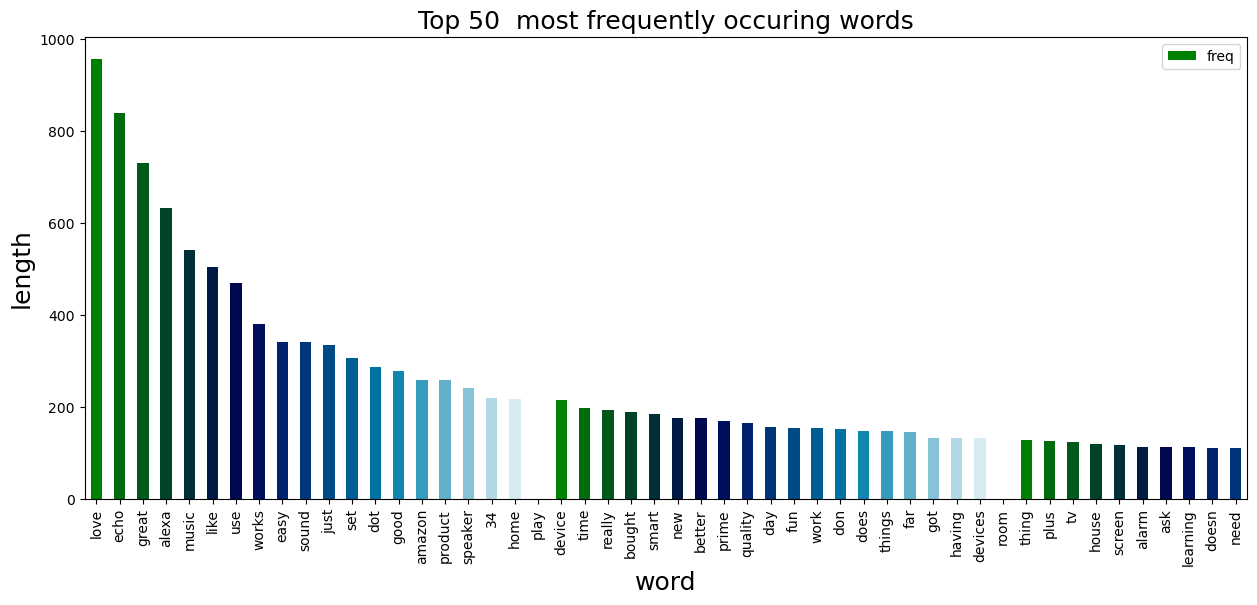

In [110]:
# returns top 50 frequently occuring words 

color_code = plt.cm.ocean(np.linspace(0, 1, 20))
Frequently_occuring_reviews.head(50).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color_code)
plt.title("Top 50  most frequently occuring words", fontsize=18)
plt.xlabel('word', fontsize=18)
plt.ylabel('length', fontsize=18);


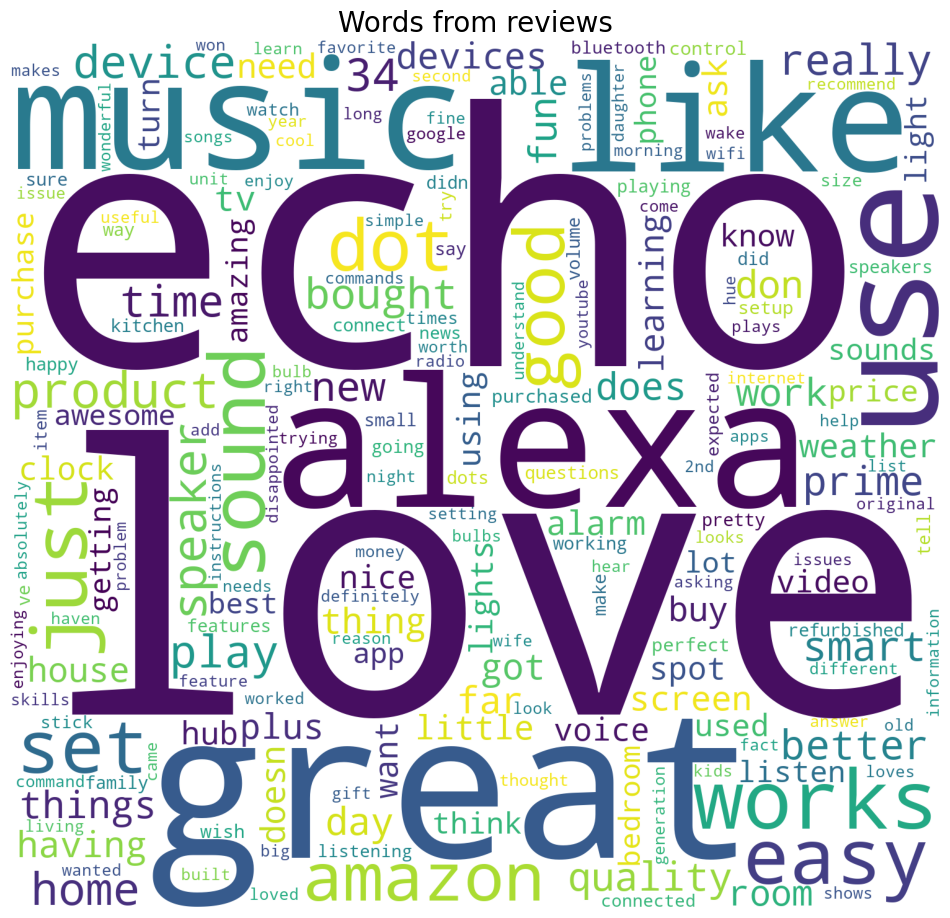

In [111]:
# Word cloud representation of input dataset words

word_cloud_reviews = WordCloud(background_color='white', width=1500, height=1400).generate_from_frequencies(dict(freq_words))
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(word_cloud_reviews)
plt.title("Words from reviews", fontsize = 20);

In [112]:
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [113]:
l = []

for i in range(0, 3150):
    ''' removing special characters in dataset except a-z and A-Z'''
    regular_words = re.sub('[^a-zA-Z]', ' ', df['verified_reviews'][i])
    ''' converting every word into lower word'''
    regular_words = regular_words.lower()
    ''' splitting text '''
    regular_words = regular_words.split()
    ''' applying Stemming '''
    ps = PorterStemmer()
    ''' removing stopwords '''
    sw = stopwords.words('english')
    sw.remove('not')
    regular_words = [ps.stem(word) for word in regular_words if not word in set(sw)]
    regular_words = ' '.join(regular_words)
    l.append(regular_words)

In [114]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [115]:
# returns vectorizer counts
count_vect = CountVectorizer(max_features=2500) 

# independent and dependent variables 
X = count_vect.fit_transform(l).toarray()
y = df.iloc[:, 4].values

In [116]:
# returns shape of X, y

print(X.shape)
print(y.shape)

(3150, 2500)
(3150,)


In [117]:
# Training the model to split the test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=26)

In [118]:
print("shape of X_train: ", X_train.shape)
print("shape of X_test: ", X_test.shape)

shape of X_train:  (2362, 2500)
shape of X_test:  (788, 2500)


In [119]:
# returns the Min and Max Scaler 
min_max_scaler = MinMaxScaler()

X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

# RANDOM FOREST

In [120]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Classifier 
rf = RandomForestClassifier()

# fit on data 
rf = rf.fit(X_train, y_train)

# predictions 
y_pred = rf.predict(X_test)

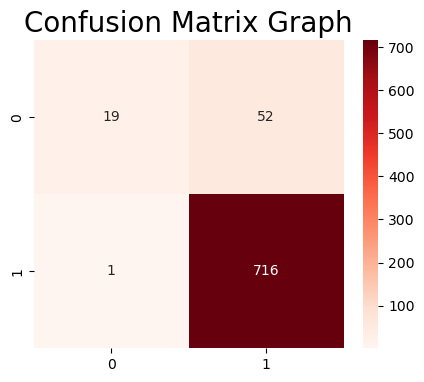

In [121]:
# logic of confusion matrix 

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Reds', fmt='g');
plt.title('Confusion Matrix Graph', fontsize=20);

In [122]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))

[[ 19  52]
 [  1 716]]


In [123]:
# returns classification report of a model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.27      0.42        71
           1       0.93      1.00      0.96       717

    accuracy                           0.93       788
   macro avg       0.94      0.63      0.69       788
weighted avg       0.93      0.93      0.92       788



In [124]:
# returns the accuracy score of a model
print(accuracy_score(y_test, y_pred))

0.932741116751269


In [125]:
from sklearn.naive_bayes import MultinomialNB

# NAVIE BAYES CLASSIFIER 

In [126]:
# Navie Bayes Classifier
nb_classifier = MultinomialNB()

# fit on data 
nb_classifier = nb_classifier.fit(X_train, y_train)

# prediction 
y_pred1 = nb_classifier.predict(X_test)

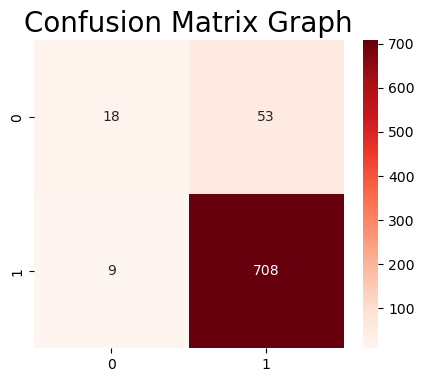

In [127]:
# confusion matrix 

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True, cmap='Reds', fmt='g');
plt.title('Confusion Matrix Graph', fontsize=20);

In [128]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred1))

[[ 18  53]
 [  9 708]]


In [129]:
# returns classification report of model
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.67      0.25      0.37        71
           1       0.93      0.99      0.96       717

    accuracy                           0.92       788
   macro avg       0.80      0.62      0.66       788
weighted avg       0.91      0.92      0.90       788



In [130]:
# returns the accuracy score of a model
print(accuracy_score(y_test, y_pred1))

0.9213197969543148


# Logistic Regression

In [131]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression
lr = LogisticRegression()

# fit on data 
lr = lr.fit(X_train, y_train)

# prediction of test data results
y_pred2 = lr.predict(X_test)

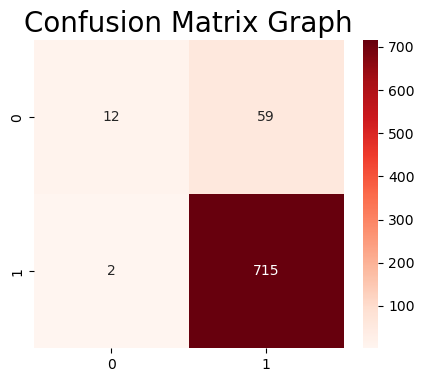

In [132]:
# returns confusion matrix of logistic regression

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, cmap='Reds', fmt='g');
plt.title('Confusion Matrix Graph', fontsize=20);

In [133]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred2))

[[ 12  59]
 [  2 715]]


In [134]:
# returns classification report of model
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.17      0.28        71
           1       0.92      1.00      0.96       717

    accuracy                           0.92       788
   macro avg       0.89      0.58      0.62       788
weighted avg       0.92      0.92      0.90       788



In [135]:
# returns accuracy score of model
print(accuracy_score(y_test, y_pred2))

0.9225888324873096


# SVM

In [136]:
from sklearn.svm import SVC

# Support Vector Machine
classifier = SVC(kernel='linear',random_state=0)

# fit on data
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [137]:
# returns the prediction of test data results

y_pred3 = classifier.predict(X_test)

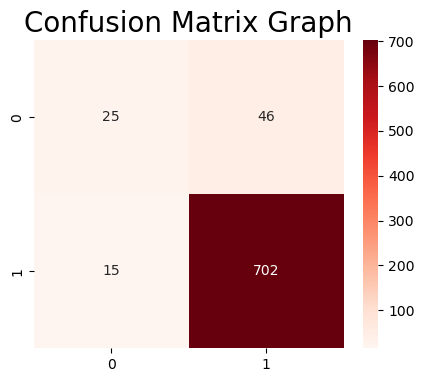

In [138]:
# returns confusion matrix of SVM

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True, cmap='Reds', fmt='g');
plt.title('Confusion Matrix Graph', fontsize=20);

In [139]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred3))

[[ 25  46]
 [ 15 702]]


In [140]:
# returns the classification report of model
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.62      0.35      0.45        71
           1       0.94      0.98      0.96       717

    accuracy                           0.92       788
   macro avg       0.78      0.67      0.70       788
weighted avg       0.91      0.92      0.91       788



In [141]:
# returns the accuracy score of model
print(accuracy_score(y_test, y_pred3))

0.9225888324873096


# MLP Classifier Neural Network

In [142]:
from sklearn.neural_network import MLPClassifier

In [143]:
# MLP Classifier
mlp_classifier = MLPClassifier(random_state=35, max_iter=250)
# fit on data
mlp_classifier.fit(X_train, y_train)

MLPClassifier(max_iter=250, random_state=35)

In [144]:
# prediction of test data results
y_pred4 = mlp_classifier.predict(X_test)

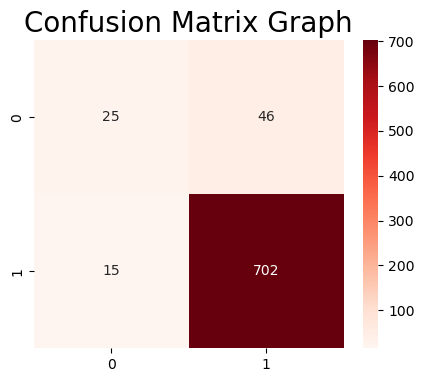

In [145]:
# confusion matrix 

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True, cmap='Reds', fmt='g');
plt.title('Confusion Matrix Graph', fontsize=20);

In [146]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred4))

[[ 27  44]
 [ 11 706]]


In [147]:
# returns the classification report of model
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.71      0.38      0.50        71
           1       0.94      0.98      0.96       717

    accuracy                           0.93       788
   macro avg       0.83      0.68      0.73       788
weighted avg       0.92      0.93      0.92       788



In [148]:
# returns the accuracy score of model
print(accuracy_score(y_test, y_pred4))

0.9302030456852792


# Analysis of Machine Learning Algorithms

<function matplotlib.pyplot.show(close=None, block=None)>

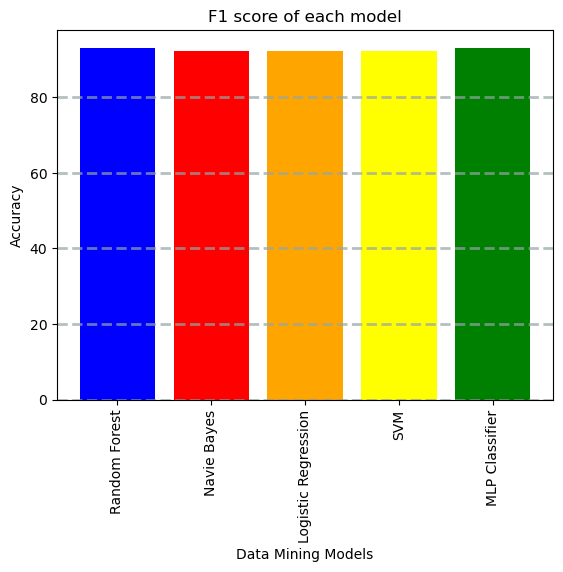

In [149]:
F1score = [93.14, 92.13, 92.25, 92.25, 93.02]
model = ['Random Forest', 'Navie Bayes', 'Logistic Regression', 'SVM', 'MLP Classifier']
plt.xticks(range(len(F1score)), model)
plt.xlabel('Data Mining Models')
plt.ylabel('Accuracy')
plt.title('F1 score of each model')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.bar(range(len(F1score)), F1score, color=['blue', 'red', 'orange', 'yellow', 'green']) 
plt.xticks(rotation=90)
plt.show

# The F1 score results that, RandomForest Classifier has better F1 score than the remaining models

# lets apply HyperParameter Tuning For Random Forest Classifier

In [150]:
p = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [151]:
grid = GridSearchCV(estimator=rf, param_grid=p, cv=10, verbose=0, scoring='accuracy', n_jobs=-1, 
                       return_train_score=True)
grid.fit(X_train, y_train.ravel())

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True, scoring='accuracy')

In [152]:
print("Accurate Parameter : {}".format(grid.best_params_))

Accurate Parameter : {'bootstrap': True, 'max_depth': 80, 'min_samples_split': 8, 'n_estimators': 300}


In [153]:
rf_cv = RandomForestClassifier(bootstrap=True, max_depth=80, min_samples_split=8, n_estimators=300)

# fit on data 
rf_cv.fit(X_train, y_train)

# prediction of test data results
pred = rf_cv.predict(X_test)

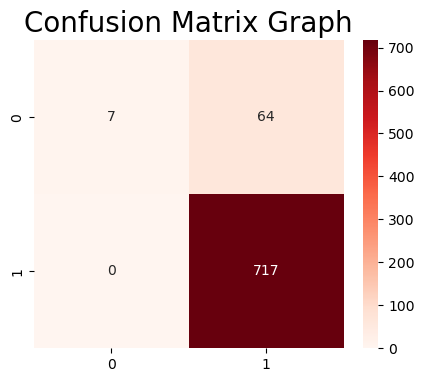

In [154]:
# confusion matrix 
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="Reds", fmt='g');
plt.title('Confusion Matrix Graph', fontsize=20);

In [155]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,pred))

[[  7  64]
 [  0 717]]


In [156]:
# returns the classification report of a model
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.10      0.18        71
           1       0.92      1.00      0.96       717

    accuracy                           0.92       788
   macro avg       0.96      0.55      0.57       788
weighted avg       0.93      0.92      0.89       788



In [157]:
# returns the accuracy score of model after hyper tuning
print(accuracy_score(y_test, pred))

0.9187817258883249


In [158]:
def predict_sentiment(review_sample):
  review_sample = re.sub(pattern='[^a-zA-Z]',repl=' ', string = review_sample)
  review_sample = review_sample.lower()
  sample_words_review = review_sample.split()
  sample_words_review = [word for word in sample_words_review if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_words_review]
  final_review = ' '.join(final_review)

  temp = count_vect.transform([final_review]).toarray()
  return rf.predict(temp)

In [159]:
# Predicting values
sample_review = 'Sound is terrible if u want good music too get a bose'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a NEGATIVE review!


In [160]:
# Predicting values
sample_review_1 = 'Sounds good music too get a bose'

if predict_sentiment(sample_review_1):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.
